# Optimal Time Flight Data

Import Required Libraries

In [78]:
# !pip install -r '../requirements.txt'

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib


In [80]:
df1 = pd.read_csv('trainable_complete2.xls')

In [81]:
df1[df1['Cabin']=='B'].head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
255026,21592,20:00,22:10,Air India,B,New Delhi,2,Mumbai,0,130,6,20,Evening_flight,9
255027,21592,15:05,18:15,Air India,B,New Delhi,2,Mumbai,1,190,6,15,Afternoon_flight,4
255028,21592,17:50,21:35,Air India,B,New Delhi,2,Mumbai,1,225,6,17,Evening_flight,6
255029,21816,15:30,17:40,Vistara,B,New Delhi,2,Mumbai,0,130,6,15,Afternoon_flight,4
255030,21816,17:45,20:05,Vistara,B,New Delhi,2,Mumbai,0,140,6,17,Evening_flight,6


**Airline**: Name of the airline used for traveling

**Cabin**: The type of service i.e. economy, business class and premium economy

**weekday**: number of weekdays the flight is operational 

**Dept_city**: Starting location of flight, souce of the flight

**arrival_city**: Ending location of flight, destination of the flight

**departure_time**: Departure time of flight from starting location

**arrival_time**: Arrival time of flight at destination

**duration**: Duration of flight in minutes

**stops**: Number of total stops flight took before landing at the destination.

**Price**: Price of the flight

**Dept_flights_time**: time of the day the flight usually takes place

**dept_hours**: 

**Dept_date**:

**optimal_hours**:

In [82]:
print(df1.shape)

(330938, 14)


There are 14 columns and 330938 rows

# Exploring the contents of data

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330938 entries, 0 to 330937
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330938 non-null  int64 
 1   departure_time     330938 non-null  object
 2   arrival_time       330938 non-null  object
 3   Airline            330938 non-null  object
 4   Cabin              330938 non-null  object
 5   Dept_city          330938 non-null  object
 6   Dept_date          330938 non-null  int64 
 7   arrival_city       330938 non-null  object
 8   stops              330938 non-null  int64 
 9   duration           330938 non-null  int64 
 10  weekday            330938 non-null  int64 
 11  dept_hours         330938 non-null  int64 
 12  Dept_flights_time  330938 non-null  object
 13  optimal_hours      330938 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 35.3+ MB


In [84]:
df1.describe()

,Price,Dept_date,stops,duration,weekday,dept_hours,optimal_hours
count,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000,330938.000000
mean,14074.894817,16.713064,1.278974,590.186636,2.902087,12.602539,12.568575
std,15968.136248,8.166245,0.802891,364.512309,2.088561,4.848977,6.882780
min,1579.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5450.000000,10.000000,1.000000,325.000000,1.000000,9.000000,7.000000
50%,7559.000000,17.000000,1.000000,515.000000,3.000000,12.000000,13.000000
75%,11742.000000,24.000000,2.000000,845.000000,5.000000,16.000000,18.000000
max,115432.000000,31.000000,6.000000,1435.000000,6.000000,23.000000,23.000000


In [85]:
df1['Airline'].unique()

array(['AirAsia', 'Go Air', 'IndiGo', 'Air India', 'Spicejet', 'Vistara',
       'Vistara, IndiGo', 'Spicejet, IndiGo', 'IndiGo, Air India',
       'Vistara, Air India', 'Air India, IndiGo', 'IndiGo, AirAsia',
       'AirAsia, IndiGo', 'IndiGo, Spicejet', 'AirAsia, Go Air',
       'AirAsia, Spicejet', 'AirAsia, Air India', 'Air India, Spicejet',
       'Go Air, IndiGo', 'Air India, Vistara', 'Spicejet, Air India',
       'Go Air, Air India', 'IndiGo, Go Air', 'Go Air, Spicejet',
       'Go Air, AirAsia', 'Air India, Go Air', 'Air India, AirAsia',
       'Vistara, Go Air', 'Vistara, AirAsia', 'TruJet, IndiGo',
       'IndiGo, Vistara', 'TruJet, Vistara', 'AirAsia, Vistara',
       'Vistara, Spicejet', 'Go Air, Vistara', 'Spicejet, Vistara',
       'Spicejet, Go Air', 'Spicejet, AirAsia', 'IndiGo, TruJet',
       'flybig, Air India', 'flybig, Spicejet', 'flybig, IndiGo',
       'flybig, Go Air', 'TruJet, Air India'], dtype=object)

This data is extremely distorted and hence requires cleaning.
Split the data into two airline columns i.e. ailine1 and airline 2

In [86]:
df1['Dept_city'].unique()

array(['New Delhi', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Chennai',
       'Kolkata', 'Kochi', 'Goa', 'Pune', 'Guwahati', 'Lucknow', 'Jaipur',
       'Patna', 'Thiruvananthapuram', 'Bhubaneswar', 'Kozhikode',
       'Bagdogra', 'Nagpur', 'Varanasi', 'Indore', 'Coimbatore',
       'Srinagar', 'Visakhapatnam', 'Ranchi', 'Amritsar', 'Chandigarh',
       'Raipur', 'Mangalore', 'Port Blair', 'Tiruchirappalli'],
      dtype=object)

In [87]:
df1['Cabin'].unique()

array(['E', 'B', 'PE'], dtype=object)

In [88]:
df1['Dept_date'].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  5])

# Data Cleaning and modification

In [89]:
df1[['Airline1','Airline2']] = df1['Airline'].str.split(',', expand=True)
df1.drop(columns = ['Airline'], inplace = True)

df1['Airline2']=df1["Airline2"].fillna(df1["Airline1"])
df1["Airline1"].apply(lambda x : x.strip())
df1["Airline2"].apply(lambda x : x.strip())

0          AirAsia
1           Go Air
2           Go Air
3           Go Air
4           Go Air
            ...   
330933    Spicejet
330934    Spicejet
330935    Spicejet
330936    Spicejet
330937     Vistara
Name: Airline2, Length: 330938, dtype: object

In [90]:
df1

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2
0,3112,14:30,20:20,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11,AirAsia,AirAsia
1,3113,16:55,21:10,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13,Go Air,Go Air
2,3113,16:45,21:05,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13,Go Air,Go Air
3,3113,07:55,13:00,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4,Go Air,Go Air
4,3113,09:00,14:20,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6,Go Air,Go Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338,09:50,23:50,PE,Port Blair,30,Mumbai,1,840,6,9,Morning_flight,15,Spicejet,Spicejet
330934,9338,09:50,08:20,PE,Port Blair,30,Mumbai,1,1350,6,9,Morning_flight,15,Spicejet,Spicejet
330935,11092,09:50,09:05,PE,Port Blair,30,Bengaluru,1,1395,6,9,Morning_flight,15,Spicejet,Spicejet
330936,5588,09:50,12:05,PE,Port Blair,30,Chennai,0,135,6,9,Morning_flight,15,Spicejet,Spicejet


In [91]:

df_Airline1 = pd.DataFrame(df1["Airline1"])
df_Airline2 = pd.DataFrame(df1["Airline2"])
df3 = pd.DataFrame()
df3 = df_Airline1.append(df_Airline2)
df3['Airline1'] = df3['Airline1'].fillna(df3['Airline2'])
df3 = df3.drop(columns=["Airline2"])
df3

,Airline1
0,AirAsia
1,Go Air
2,Go Air
3,Go Air
4,Go Air
...,...
330933,Spicejet
330934,Spicejet
330935,Spicejet
330936,Spicejet


Cleaning the distorted data of Airlines columns by splitting the multivalued rows into two columns.

<AxesSubplot:xlabel='Price'>

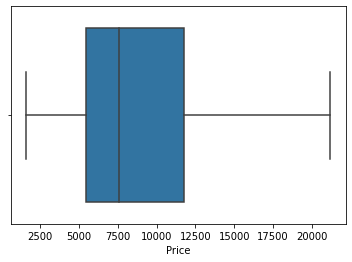

In [92]:
def remove_outliers(df, col):
    Q1 = np.percentile(df[col], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[col], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    # Upper bound
    upper = (Q3+1.5*IQR)
    # Lower bound
    lower = (Q1-1.5*IQR)
    return lower,upper

lower, upper = remove_outliers(df1,'Price')
df1['Price']=np.where(df1['Price']>upper,upper,df1['Price'])
df1['Price']=np.where(df1['Price']<lower,lower,df1['Price'])
Y1=df1['Price']

sns.boxplot(df1['Price'])

In [93]:
duration_col = df1.duration
duration_col.replace(to_replace=0 , value=duration_col.mean(), inplace=True)

In [94]:
df1.replace({'Dept_flights_time': {'Afternoon_flight': 0, 'Evening_flight': 1, 'Morning_flight':2, 'Night_flight':3}},inplace=True)
df1.replace({'Cabin': {'E': 0, 'B': 1, 'PE':2}},inplace=True)

In [95]:
df1['arrival_city'] = df1['arrival_city'].apply(lambda x : x.strip())
df1['arrival_city'] = df1['arrival_city'].apply(lambda x : x.lower())
df1['Dept_city'] = df1['Dept_city'].apply(lambda x : x.strip())
df1['Dept_city'] = df1['Dept_city'].apply(lambda x : x.lower())

In [96]:
df_Airline1 = pd.DataFrame(df1["arrival_city"])
df_Airline2 = pd.DataFrame(df1["Dept_city"])
df5 = pd.DataFrame()
df5 = df_Airline1.append(df_Airline2)
df5['arrival_city'] = df5['arrival_city'].fillna(df5['Dept_city'])
df5 = df5.drop(columns=["Dept_city"])

In [97]:
df1

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2
0,3112.0,14:30,20:20,0,new delhi,1,mumbai,1,350.0,5,14,0,11,AirAsia,AirAsia
1,3113.0,16:55,21:10,0,new delhi,1,mumbai,1,255.0,5,16,1,13,Go Air,Go Air
2,3113.0,16:45,21:05,0,new delhi,1,mumbai,1,260.0,5,16,1,13,Go Air,Go Air
3,3113.0,07:55,13:00,0,new delhi,1,mumbai,1,305.0,5,7,2,4,Go Air,Go Air
4,3113.0,09:00,14:20,0,new delhi,1,mumbai,1,320.0,5,9,2,6,Go Air,Go Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338.0,09:50,23:50,2,port blair,30,mumbai,1,840.0,6,9,2,15,Spicejet,Spicejet
330934,9338.0,09:50,08:20,2,port blair,30,mumbai,1,1350.0,6,9,2,15,Spicejet,Spicejet
330935,11092.0,09:50,09:05,2,port blair,30,bengaluru,1,1395.0,6,9,2,15,Spicejet,Spicejet
330936,5588.0,09:50,12:05,2,port blair,30,chennai,0,135.0,6,9,2,15,Spicejet,Spicejet


# Target Variable

In [98]:
CabinE = df1.loc[df1['Cabin'] == 0]
CabinB = df1.loc[df1['Cabin'] == 1]
CabinPE = df1.loc[df1['Cabin'] == 2]

In [99]:
CabinPE

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2
317799,6855.0,18:55,21:35,2,new delhi,10,chennai,0,160.0,0,18,1,2,Spicejet,Spicejet
317800,12168.0,19:10,13:15,2,new delhi,10,chennai,1,1085.0,0,19,1,3,Spicejet,Spicejet
317801,10096.0,19:10,20:25,2,new delhi,10,guwahati,1,75.0,0,19,1,3,Spicejet,Spicejet
317802,11788.0,19:10,20:50,2,new delhi,10,patna,0,100.0,0,19,1,3,Spicejet,Spicejet
317803,6147.0,19:45,21:55,2,mumbai,10,new delhi,0,130.0,0,19,1,3,Vistara,Vistara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330933,9338.0,09:50,23:50,2,port blair,30,mumbai,1,840.0,6,9,2,15,Spicejet,Spicejet
330934,9338.0,09:50,08:20,2,port blair,30,mumbai,1,1350.0,6,9,2,15,Spicejet,Spicejet
330935,11092.0,09:50,09:05,2,port blair,30,bengaluru,1,1395.0,6,9,2,15,Spicejet,Spicejet
330936,5588.0,09:50,12:05,2,port blair,30,chennai,0,135.0,6,9,2,15,Spicejet,Spicejet


In [100]:
Dataframes = []
Dataframes.append(CabinE)
Dataframes.append(CabinB)
Dataframes.append(CabinPE)
# Concatinating into a new dataframe so that label conflict doesnt occur in both Airlines
for x in Dataframes:
    le =LabelEncoder()
    if(x.equals(CabinB)):
        le.fit(df3)
        integer_mapping = {l: i for i, l in enumerate(le.classes_)}
        x.replace({'Airline1' : integer_mapping},inplace=True)
        x.replace({'Airline2' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'B/B_airline_dict.pkl', compress=True)
        le.fit(df5)
        integer_mapping = {l: i for i, l in enumerate(le.classes_)}
        x.replace({'arrival_city' : integer_mapping},inplace=True)
        x.replace({'Dept_city' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'B/B_City_dict.pkl', compress=True)
        
    elif(x.equals(CabinE)):
        le.fit(df3)
        integer_mapping = {l: i for i, l in enumerate(le.classes_)}
        x.replace({'Airline1' : integer_mapping},inplace=True)
        x.replace({'Airline2' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'E/E_airline_dict.pkl', compress=True)
        le.fit(df5)
        integer_mapping = {l: str(i) for i, l in enumerate(le.classes_)}
        x.replace({'arrival_city' : integer_mapping},inplace=True)
        x.replace({'Dept_city' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'E/E_City_dict.pkl', compress=True)

    elif(x.equals(CabinPE)):
        le.fit(df3)
        integer_mapping = {l: i for i, l in enumerate(le.classes_)}
        x.replace({'Airline1' : integer_mapping},inplace=True)
        x.replace({'Airline2' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'PE/PE_airline_dict.pkl', compress=True)
        le.fit(df5)
        integer_mapping = {l: i for i, l in enumerate(le.classes_)}
        print(integer_mapping)
        x.replace({'arrival_city' : integer_mapping},inplace=True)
        x.replace({'Dept_city' : integer_mapping},inplace=True)
        joblib.dump(integer_mapping, 'PE/PE_City_dict.pkl', compress=True)
        

{'amritsar': 0, 'bagdogra': 1, 'bengaluru': 2, 'bhubaneswar': 3, 'chandigarh': 4, 'chennai': 5, 'coimbatore': 6, 'goa': 7, 'guwahati': 8, 'hyderabad': 9, 'indore': 10, 'jaipur': 11, 'kochi': 12, 'kolkata': 13, 'kozhikode': 14, 'lucknow': 15, 'mangalore': 16, 'mumbai': 17, 'nagpur': 18, 'new delhi': 19, 'patna': 20, 'port blair': 21, 'pune': 22, 'raipur': 23, 'ranchi': 24, 'srinagar': 25, 'thiruvananthapuram': 26, 'tiruchirappalli': 27, 'varanasi': 28, 'visakhapatnam': 29}


In [101]:

for x in Dataframes:
    if(x.equals(CabinE)):
        duration_df = pd.DataFrame()
        duration_df['duration_key'] = x['Dept_city'].astype(str) +','+ x['arrival_city'].astype(str)
        duration_df['duration'] =x['duration']
        dicts = duration_df.set_index('duration_key').to_dict()['duration']
        joblib.dump(dicts, 'E/E_duration.pkl', compress=True)
    elif(x.equals(CabinPE)):
        duration_df = pd.DataFrame()
        duration_df['duration_key'] = x['Dept_city'].astype(str) +','+ x['arrival_city'].astype(str)
        duration_df['duration'] =x['duration']
        dicts = duration_df.set_index('duration_key').to_dict()['duration']
        joblib.dump(dicts, 'PE/PE_duration.pkl', compress=True)
    elif(x.equals(CabinB)):
        duration_df = pd.DataFrame()
        duration_df['duration_key'] = x['Dept_city'].astype(str) +','+ x['arrival_city'].astype(str)
        duration_df['duration'] =x['duration']
        dicts = duration_df.set_index('duration_key').to_dict()['duration']
        joblib.dump(dicts, 'B/B_duration.pkl', compress=True)
    

In [102]:
CabinB

,Price,departure_time,arrival_time,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline1,Airline2
255026,21180.0,20:00,22:10,1,19,2,17,0,130.0,6,20,1,9,7,7
255027,21180.0,15:05,18:15,1,19,2,17,1,190.0,6,15,0,4,7,7
255028,21180.0,17:50,21:35,1,19,2,17,1,225.0,6,17,1,6,7,7
255029,21180.0,15:30,17:40,1,19,2,17,0,130.0,6,15,0,4,13,13
255030,21180.0,17:45,20:05,1,19,2,17,0,140.0,6,17,1,6,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317794,21180.0,14:15,08:50,1,29,31,25,2,1115.0,0,14,0,22,7,7
317795,21180.0,12:30,22:20,1,29,31,0,1,590.0,0,12,0,20,7,7
317796,21180.0,14:15,06:15,1,29,31,0,2,960.0,0,14,0,22,7,7
317797,21180.0,12:30,09:50,1,29,31,0,2,1280.0,0,12,0,20,7,7


# Random Forest Regressor for predicting optimal time

In [103]:
results = []
x=0
for i in Dataframes:
    target= i["optimal_hours"]
    df2 = i.drop(columns = ['optimal_hours','Price','arrival_time',"departure_time",'Airline1','Airline2','stops'])
    print(df2.shape)
    X_train, X_test, y_train, y_test = train_test_split(df2,target, test_size=0.2)
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    my_pipeline = Pipeline([
    ('scaler', StandardScaler().fit(X_train,y_train)),
    # ('DimensionReduction',PCA(n_components=6)),
    ('model', model)
    ])
    if(x==0):
        my_pipeline.fit(X_train, y_train)
        file = open('E/E_time_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('E/E_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
        
        file.close()
    elif(x==1):
        my_pipeline.fit(X_train, y_train)
        file = open('B/B_time_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('B/B_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
    elif(x==2):
        my_pipeline.fit(X_train, y_train)
        file = open('PE/PE_time_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('PE/PE_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
    results.append(my_pipeline.score(X_test, y_test))
    x=x+1

(255026, 8)
(62773, 8)
(13139, 8)


In [104]:
results

[0.9225270052877425, 0.9612209855531603, 0.8727063158965438]

In [105]:
for i in Dataframes:
    if(i.equals(CabinE)):
        i['optimal_hours_predicted']=joblib.load('E/E_time_predict.pkl').predict(i.drop(columns = ['optimal_hours','Price','arrival_time',"departure_time",'Airline1','Airline2','stops']))
    elif(i.equals(CabinB)):
        i['optimal_hours_predicted']=joblib.load('B/B_time_predict.pkl').predict(i.drop(columns = ['optimal_hours','Price','arrival_time',"departure_time",'Airline1','Airline2','stops']))
    elif(i.equals(CabinPE)):
        i['optimal_hours_predicted']=joblib.load('PE/PE_time_predict.pkl').predict(i.drop(columns = ['optimal_hours','Price','arrival_time',"departure_time",'Airline1','Airline2','stops']))

In [ ]:
results = []
x=0
for i in Dataframes:
    target= i["Price"]
    df2 = i.drop(columns = ['optimal_hours','Price','arrival_time',"departure_time",'Airline1','Airline2','stops'])
    X_train, X_test, y_train, y_test = train_test_split(df2,target, test_size=0.2)
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    my_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
    ])
    if(x==0):
        my_pipeline.fit(X_train, y_train)
        file = open('E/E_price_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('E/E_price_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
        
        file.close()
    elif(x==1):
        my_pipeline.fit(X_train, y_train)
        file = open('B/B_price_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('B/B_price_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
    elif(x==2):
        my_pipeline.fit(X_train, y_train)
        file = open('PE/PE_price_predict.pkl', 'wb')
        pickle.dump(my_pipeline['model'], file)
        file = open('PE/PE_price_scaler.pkl', 'wb')
        pickle.dump(my_pipeline['scaler'], file)
    results.append(my_pipeline.score(X_test, y_test))
    x=x+1
